In [2]:
import numpy as np
import pandas as pd

In [2]:
campaigns = pd.read_csv('ExportCampaigns.csv')
sales = pd.read_csv('ExportSales.csv', low_memory = False)
customer_data = pd.read_csv('ExportCustomerData.csv', low_memory = False)
cd_history_detail = pd.read_csv('ExportCustomerDataHistoryDetail.csv', low_memory = False)

In [3]:
campaigns.head()

,CampaignID,Campaign_Type,ListSegment,Product_Version,ImportedDate
0,B7270,Acquisition,2,PA,NaN
1,B7386,Acquisition,1,PA,NaN
2,B7387,Acquisition,1,PA,NaN
3,B7391,X Sell,1,PA,NaN
4,B7432,Acquisition,2,PA,NaN


In [4]:
campaigns.isnull().any()

CampaignID         False
Campaign_Type      False
ListSegment        False
Product_Version    False
ImportedDate        True
dtype: bool

In [5]:
print(campaigns["ImportedDate"].isnull().sum())
print(campaigns.shape)

99
(102, 5)


In [6]:
campaigns['ImportedDate'] = campaigns['ImportedDate'].fillna(0)

In [7]:
campaigns['ImportedDate']

0            0
1            0
2            0
3            0
4            0
        ...   
97           0
98           0
99           0
100    46:08.3
101    46:08.3
Name: ImportedDate, Length: 102, dtype: object

In [8]:
campaigns = pd.DataFrame.drop(campaigns, columns = "ImportedDate")

In [9]:
campaigns["Product_Version"].unique()

array(['PA'], dtype=object)

# ExportCustomerData Dataset

In [10]:
customer_data.head(20)

,CampaignID,Cust_ID,Reserved1,Spare2,Client_Title,Client_Surname,ID_No,HomeTelephone,WorkTelephone,Cellphone,Postal_Code,Sex,Lang,Marital_Status,Batch_ID,Media_Code,Age,PresentedLang,ImportedDate
0,B7270,4,NaN,NaN,MISS,PIENAAR,775C91B3-392A-4D74-860C-29A4D5189DF6,*******,*******,061*******,8730,F,E,S,NaN,2558.0,26.0,NaN,NaN
1,B7270,5,NaN,NaN,MRS,TIMMY,0284B24B-AD78-4A35-A975-900990B58427,*******,*******,073*******,7530,F,NaN,M,NaN,2559.0,27.0,NaN,NaN
2,B7270,6,NaN,NaN,MISS,NGCOBO,CF7FD54D-4BD3-4B82-AFFC-8CBAB0308E12,*******,*******,071*******,4225,F,E,S,NaN,2558.0,29.0,NaN,NaN
3,B7270,7,NaN,NaN,MS,SHABANGU,6B03A449-9DFF-4D6F-B01C-43E8F3EAA2A1,060*******,060*******,079*******,1520,F,Z,S,2.0,2558.0,27.0,NaN,NaN
4,B7270,8,NaN,NaN,MISS,MCHUNU,7ACF7758-730E-48A5-B11B-C5AE76DFE788,*******,*******,071*******,3610,F,Z,S,2.0,2558.0,27.0,NaN,NaN
5,B7270,9,NaN,NaN,MRS,MADIHLABA,1AB05275-405E-49DF-93B2-90DBD9569377,*******,*******,078*******,0194,F,E,S,2.0,2559.0,40.0,NaN,NaN
6,B7270,10,NaN,NaN,MRS,MUKWEVHO,BEBF7073-6555-48B9-B274-4CF8225EBB51,*******,079*******,*******,1754,F,NaN,M,2.0,2559.0,31.0,NaN,NaN
7,B7270,11,NaN,NaN,MISS,DHLAMINI,DD91E373-B3EE-4D13-8DDA-59CFCCF26AC8,*******,*******,072*******,1035,F,E,S,2.0,2559.0,27.0,NaN,NaN
8,B7270,12,NaN,NaN,MISS,PETERSEN,855F4846-484A-461C-B300-BE9B96DA67D7,*******,*******,074*******,7945,F,E,S,3.0,2558.0,23.0,NaN,NaN
9,B7270,13,NaN,NaN,MISS,TENGE,D26DED63-0BAF-4278-9592-877132FE807A,*******,*******,078*******,1818,F,E,S,2.0,2558.0,22.0,NaN,NaN


In [11]:
customer_data.isnull().sum()

CampaignID              0
Cust_ID                 0
Reserved1         4423753
Spare2            4135016
Client_Title           83
Client_Surname         64
ID_No                   0
HomeTelephone           0
WorkTelephone           0
Cellphone               0
Postal_Code         33402
Sex                   160
Lang                28772
Marital_Status    4451842
Batch_ID          1191832
Media_Code          42889
Age                   160
PresentedLang     4436409
ImportedDate      4614428
dtype: int64

In [12]:
customer_data.shape

(4733545, 19)

In [13]:
# the title of clients is not important, and marital_status is mostly empty, as are presentedLang and ImportedDate 
customer_data = pd.DataFrame.drop(customer_data, columns = ["Client_Title", "Marital_Status", "PresentedLang", "ImportedDate"])

In [14]:
# dropped telephone numbers and media_code because it didn't seem important to me to analyze by the phone numbers
# also, media_code is client defined, which can lead to external bias and can't really help us in our analysis

customer_data = pd.DataFrame.drop(customer_data, columns = ["HomeTelephone", "WorkTelephone", "Cellphone", "Media_Code"])

In [15]:
customer_data["Client_Surname"] = customer_data["Client_Surname"].str.lower()

In [16]:
customer_data["Client_Surname"] = customer_data["Client_Surname"].str.capitalize()

In [44]:
customer_data = pd.DataFrame.drop(customer_data, columns = "Client_Surname")

In [17]:
print(customer_data.shape)
duplicate_rows_customer_data = customer_data[customer_data.duplicated()]

print(duplicate_rows_customer_data.shape)

(4733545, 11)
(0, 11)


In [18]:
# no duplicate rows that we need to worry about

In [19]:
customer_data["Sex"].unique()

array(['F', 'M', nan], dtype=object)

In [20]:
customer_data["Sex"] = customer_data["Sex"].replace(np.nan, "Other")

In [21]:
customer_data["Sex"].unique()

array(['F', 'M', 'Other'], dtype=object)

In [22]:
customer_data.isnull().sum()

CampaignID              0
Cust_ID                 0
Reserved1         4423753
Spare2            4135016
Client_Surname         64
ID_No                   0
Postal_Code         33402
Sex                     0
Lang                28772
Batch_ID          1191832
Age                   160
dtype: int64

In [23]:
customer_data["Age"].unique()

array([26., 27., 29., 40., 31., 23., 22., 24., 28., 32., 25., 33., 38.,
       37., 35., 34., 36., 39., 20., 21., 30., 41., 54., 47., 53., 49.,
       46., 50., 56., 44., 60., 58., 52., 59., 43., 63., 62., 45., 55.,
       61., 64., 42., 57., 51., 19., 48., 18., 65., 72., nan])

In [38]:
customer_data["Cust_ID"].unique()

array([        4,         5,         6, ..., 500000018, 500000019,
       500000020], dtype=int64)

In [45]:
customer_data.head()

,CampaignID,Cust_ID,Reserved1,Spare2,ID_No,Postal_Code,Sex,Lang,Batch_ID,Age
0,B7270,4,NaN,NaN,775C91B3-392A-4D74-860C-29A4D5189DF6,8730,F,E,NaN,26.0
1,B7270,5,NaN,NaN,0284B24B-AD78-4A35-A975-900990B58427,7530,F,NaN,NaN,27.0
2,B7270,6,NaN,NaN,CF7FD54D-4BD3-4B82-AFFC-8CBAB0308E12,4225,F,E,NaN,29.0
3,B7270,7,NaN,NaN,6B03A449-9DFF-4D6F-B01C-43E8F3EAA2A1,1520,F,Z,2.0,27.0
4,B7270,8,NaN,NaN,7ACF7758-730E-48A5-B11B-C5AE76DFE788,3610,F,Z,2.0,27.0


In [49]:
customer_data.shape

(4733545, 10)

In [50]:
customer_data.describe()

,Cust_ID,Batch_ID,Age
count,4.733545e+06,3.541713e+06,4.733385e+06
mean,6.124170e+04,1.383465e+01,4.348966e+01
std,1.164743e+06,1.068799e+01,1.148199e+01
min,4.000000e+00,1.000000e+00,1.800000e+01
25%,1.548900e+04,6.000000e+00,3.400000e+01
50%,3.682400e+04,1.200000e+01,4.300000e+01
75%,6.700100e+04,1.900000e+01,5.300000e+01
max,5.000000e+08,5.700000e+01,7.200000e+01


In [52]:
customer_data["Age"] = customer_data["Age"].replace(np.nan, "43")

In [54]:
customer_data["Age"] = pd.to_numeric(customer_data["Age"])

In [56]:
customer_data.isnull().sum()

CampaignID           0
Cust_ID              0
Reserved1      4423753
Spare2         4135016
ID_No                0
Postal_Code      33402
Sex                  0
Lang             28772
Batch_ID       1191832
Age                  0
dtype: int64

In [57]:
customer_data.to_csv('Clean_ExportCustomerData.csv', index = False)

# ExportSales Dataset

In [24]:
sales.columns

Index(['CampaignID', 'Cust_id', 'Policy_no', 'Sale_Status', 'Sale_date',
       'Verified_Date', 'Not_Sale_Date', 'Emp_ID', 'Client_title',
       'Client_Surname', 'ID_No', 'Sex', 'Lang', 'Marital_Status',
       'Family_To_Cover', 'Premium', 'Effective_Date', 'Date_of_Debit',
       'EMailFulfilment', 'Cover_Amount', 'ImportedDate'],
      dtype='object')

In [58]:
print(sales.isnull().any())
print()
print(sales.shape)
print(sales.dtypes)
print()
print(sales.isnull().sum())

CampaignID         False
Cust_id            False
Policy_no          False
Sale_Status        False
Sale_date          False
Verified_Date       True
Emp_ID             False
ID_No              False
Sex                False
Lang               False
Marital_Status     False
Family_To_Cover    False
Premium            False
Effective_Date     False
Date_of_Debit       True
Cover_Amount        True
dtype: bool

(152567, 16)
CampaignID          object
Cust_id              int64
Policy_no           object
Sale_Status         object
Sale_date           object
Verified_Date       object
Emp_ID               int64
ID_No               object
Sex                 object
Lang                object
Marital_Status      object
Family_To_Cover     object
Premium            float64
Effective_Date      object
Date_of_Debit       object
Cover_Amount       float64
dtype: object

CampaignID             0
Cust_id                0
Policy_no              0
Sale_Status            0
Sale_date              0
Ve

In [26]:
# dropping Client_Title such as previous datasets, ImportedDate is missing most values, Not_Sale_Date is when an agent selects
# a call result that is unverifiable, so that can't be helped much. EmailFulfillment is a binary column that just 
# represents if the client wants an email sent to them or not, which won't help us much either 
sales = pd.DataFrame.drop(sales, columns = ["Client_title", "ImportedDate", "Not_Sale_Date", "EMailFulfilment", "Client_Surname"])
sales.head()

,CampaignID,Cust_id,Policy_no,Sale_Status,Sale_date,Verified_Date,Emp_ID,ID_No,Sex,Lang,Marital_Status,Family_To_Cover,Premium,Effective_Date,Date_of_Debit,Cover_Amount
0,B7270,4,OKS00000017270,Cancelled,53:25.1,NaN,13439,775C91B3-392A-4D74-860C-29A4D5189DF6,F,E,S,Individual Only,59.0,00:00.0,00:00.0,150000.0
1,B7270,5,OKS00000027270,Cancelled,54:57.9,NaN,13439,0284B24B-AD78-4A35-A975-900990B58427,F,E,S,Individual Only,44.0,00:00.0,00:00.0,100000.0
2,B7270,6,OKS00000037270,Cancelled,12:52.8,NaN,13439,CF7FD54D-4BD3-4B82-AFFC-8CBAB0308E12,F,E,S,Individual Only,29.0,00:00.0,00:00.0,50000.0
3,B7270,22,OKS00000377270,Accepted,09:04.1,40:01.5,16748,403ED25C-B261-40A6-9F39-CE2F2DCA8AF2,M,E,S,Individual Only,59.0,00:00.0,00:00.0,150000.0
4,B7270,44,OKS00002367270,Accepted,19:23.1,30:01.4,16790,5AF5B41A-AA6D-49AB-BC22-84BFB72FDFEC,M,E,S,Individual Only,59.0,00:00.0,00:00.0,150000.0


In [27]:
sales.describe()

,Cust_id,Emp_ID,Premium,Cover_Amount
count,152567.000000,152567.000000,152567.000000,1.498810e+05
mean,53459.665989,17289.850577,97.061014,2.289713e+05
std,67264.646943,1699.161942,49.861076,1.638579e+05
min,4.000000,1987.000000,-96.840000,0.000000e+00
25%,13736.000000,16691.000000,77.680000,1.500000e+05
50%,34230.000000,17283.000000,94.320000,2.500000e+05
75%,68817.500000,18204.000000,111.000000,3.000000e+05
max,482786.000000,21168.000000,689.760000,1.500000e+06


In [28]:
print(sales.shape)
duplicate_rows_sales = sales[sales.duplicated()]

print(duplicate_rows_sales.shape)

(152567, 16)
(0, 16)


In [29]:
sales["Policy_no"]

0         OKS00000017270
1         OKS00000027270
2         OKS00000037270
3         OKS00000377270
4         OKS00002367270
               ...      
152562    OKS00000048461
152563    OKS00000058461
152564    OKS00000088461
152565    OKS00000078461
152566    OKS00000118461
Name: Policy_no, Length: 152567, dtype: object

<AxesSubplot:>

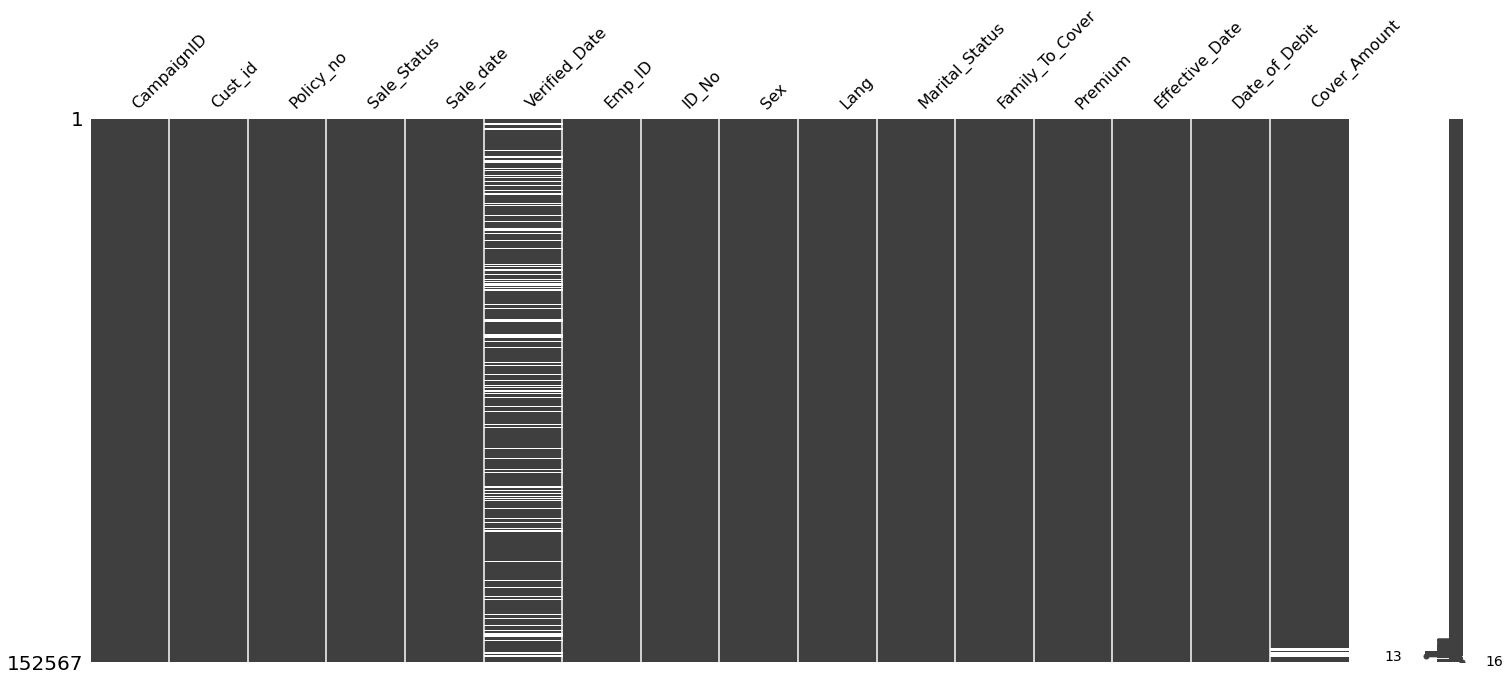

In [30]:
import missingno as msno

msno.matrix(sales)

In [31]:
sales.Cover_Amount == 15000

0         False
1         False
2         False
3         False
4         False
          ...  
152562    False
152563    False
152564    False
152565    False
152566    False
Name: Cover_Amount, Length: 152567, dtype: bool

In [41]:
sales["Cust_id"].unique()

array([    4,     5,     6, ..., 62651, 62711, 62727], dtype=int64)

In [59]:
sales.to_csv('Clean_ExportSales.csv', index = False)

# ExportCustomerDataHistoryDetail Dataset

In [32]:
cd_history_detail.head()

,ID_No,Title,Surname,Product_Category,Benefit_Level,Cover_Level,Policy_Status,Inception_Date_As_Text,CancelledDate,HistoryID,InceptionDateCorrected,ImportedDate
0,BE8925FE-B565-4BDB-946E-00000AE0DADC,Mr,XAYIMPI,Accidental Death And Permanent Disability,250000,Insured,C,06/06/2019,2019-06-07 00:00:00.000,1,2019-06-06 00:00:00.000,2021-09-28 14:02:27.377
1,BE8925FE-B565-4BDB-946E-00000AE0DADC,Mr,XAYIMPI,Hospital Plan,300,Insured And Spouse,C,03/24/2020,2020-03-25 00:00:00.000,2,2020-03-24 00:00:00.000,2021-09-28 14:02:27.377
2,C569C08D-DA88-48DC-BCBC-00001D74FCD8,Mrs,MOSIA,Accidental Death And Permanent Disability,300000,Insured,C,2017/09/26,2017-09-27 00:00:00.000,3,2017-09-26 00:00:00.000,2021-09-28 14:02:27.377
3,C569C08D-DA88-48DC-BCBC-00001D74FCD8,Mrs,MOSIA,Accidental Death And Permanent Disability,250000,Insured,C,04/04/2019,2019-04-05 00:00:00.000,4,2019-04-04 00:00:00.000,2021-09-28 14:02:27.377
4,F36FD960-C4F4-4736-8513-0000423F7BAF,Mrs,NKABINDE,Accidental Death And Permanent Disability,250000,Insured,A,10/09/2020,NaN,5,2020-10-09 00:00:00.000,2021-09-28 14:02:27.377


In [33]:
cd_history_detail.isnull().any()
print(cd_history_detail.shape)

(752542, 12)


In [34]:
cd_history_detail.isnull().sum()

ID_No                          0
Title                          0
Surname                      229
Product_Category               0
Benefit_Level                  6
Cover_Level                    0
Policy_Status                  0
Inception_Date_As_Text         1
CancelledDate             357812
HistoryID                      0
InceptionDateCorrected         1
ImportedDate                   0
dtype: int64

In [35]:
cd_history_detail = pd.DataFrame.drop(cd_history_detail, columns = ["Title", "Surname", "Inception_Date_As_Text"])

In [36]:
cd_history_detail.head()

,ID_No,Product_Category,Benefit_Level,Cover_Level,Policy_Status,CancelledDate,HistoryID,InceptionDateCorrected,ImportedDate
0,BE8925FE-B565-4BDB-946E-00000AE0DADC,Accidental Death And Permanent Disability,250000,Insured,C,2019-06-07 00:00:00.000,1,2019-06-06 00:00:00.000,2021-09-28 14:02:27.377
1,BE8925FE-B565-4BDB-946E-00000AE0DADC,Hospital Plan,300,Insured And Spouse,C,2020-03-25 00:00:00.000,2,2020-03-24 00:00:00.000,2021-09-28 14:02:27.377
2,C569C08D-DA88-48DC-BCBC-00001D74FCD8,Accidental Death And Permanent Disability,300000,Insured,C,2017-09-27 00:00:00.000,3,2017-09-26 00:00:00.000,2021-09-28 14:02:27.377
3,C569C08D-DA88-48DC-BCBC-00001D74FCD8,Accidental Death And Permanent Disability,250000,Insured,C,2019-04-05 00:00:00.000,4,2019-04-04 00:00:00.000,2021-09-28 14:02:27.377
4,F36FD960-C4F4-4736-8513-0000423F7BAF,Accidental Death And Permanent Disability,250000,Insured,A,NaN,5,2020-10-09 00:00:00.000,2021-09-28 14:02:27.377


In [60]:
cd_history_detail.to_csv('Clean_ExportCustomerDataHistoryDetail.csv', index = False)

In [3]:
cd_detail_additional = pd.read_csv('ExportCustomerDetailAdditional.csv', low_memory = False)

In [4]:
cd_detail_additional.shape

(4733543, 22)

In [5]:
cd_detail_additional.isnull().sum()

CampaignID                    0
cust_id                       0
SuggestedPlan           3577924
ClientBehaviour         2756896
BankAccountIndicator    4733543
ClientAccountNumber     4733543
Percentile_TakeUp       4285780
Percentile_Survival     4285780
StopSMS                 1891964
avg_est_income          3108042
cust_od_lim_count       4176283
cust_od_lim_sum         4731834
avg_bal_01              3100332
avg_bal_avail           3029596
marital_status          3046159
derived_age             3029596
Salary_date             3452306
confidence              4375929
date_range              4413258
wage_earner             3312835
day_of_week             4713135
ImportedDate            4614426
dtype: int64